<a href="https://colab.research.google.com/github/AngieDiaz27/Materiales-PP-Coderhouse/blob/main/Trabajo_Final_DiazAngelina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de Stock de Materiales Por Pedido**

Autor: Angelina Diaz Fecha: 2024

### DATASET: ANALISIS DE STOCK DE MATERIALES POR PEDIDO:

Abstract: A continuación, voy a presentar una base de datos sobre una empresa distribuidora de energía. La misma administra sus materiales según su consumo, para prestar su servicio. La base de datos es sacada de su sistema SAP, en el cual se gestiona el stock disponible. Sus materiales son calificados de dos formas para tener una mejor administración, y así gestionar su stock permanente o no. A continuación detallare sus diferencias. Materiales por pedidos o llamados PP, donde su uso no son habitual por lo cual es importante para el desarrollo de la actividad, pero no deberían gestionar su compra para mantener siempre un stock mínimo de los mismos. Y el otro grupo se trata de materiales de gestión de stock que se los denomina GS, donde su uso es de consumo habitual, y de los cuales se controla que siempre se tenga una cobertura de stock físico para asegurar el desarrollo de la tarea de la empresa. Por lo cual el desafío de la empresa es mantener el stock mínimo de los materiales PP sin que ello incurra en un activo inmovilizado.

VARIABLES DE INTERES:


**METADATA**

El origen de la información es de SAP, de una base de datos de una Empresa Distribuidora de Electricidad de Mendoza, de Noviembre de 2024.

El Dataset comprende 1840 filas y 19 columnas. En este contexto, buscamos hipótesis para determinar si se cumplen los objetivos de la empresa sobre los materiales PP.

**HIPOTESIS**

1)- ¿ Se puede identificar si los materiales PP brindados por esta base de datos estan bien calificados segun su consumo?

2)-¿ Se cubre el consumo de materiales con el stock existente y las compras emitidas?

3)- ¿Cual es el Grupo de Material que tiene mayor importancia dentro de la empresa?

4) ¿Tienen mayores consumos los materiales que tienen mayor stock?



Las variables más relevantes para realizar ese tipo de predicciones son las siguientes: de la base de datos podemos analizar la siguiente información sobre los materiales por pedido (PP):

 Cob_Fís: Cobertura física. La misma indica tomando en consideración el consumo de materiales, el stock y las reservas, por cuantos meses estoy cubierto a la fecha, con el material. Esta variable hace referencia al stock fisico que hay en el Almancen.

 Cob_Pot: Cobertura Potencial. La misma considera el tiempo de entrega de una posible compra. Analiza las compras de ese material y analiza la demora en la entrega, lo que nos da como resultado cuantos meses estaría cubierto. Esta variable hace referencia a la gestion de aprovisionamiento que se hizo para tener stock en los proximos meses. Muestra si se va a poder cubrir el consumo con el stock comprado y el existente.

**DEFINICION DE OBJETIVOS**

Objetivo General: Es que la información brindada sea optima para la toma de decisiones, para poder explorar el comportamiento de  uno de los tipos de materiales de la empresa, que se los denomina "por pedido". Tambien es determinar su relevancia en la empresa.

**CONTEXTO COMERCIAL**

Se trata de un listado de materiales, caracterizados por su consumo que tienen poca rotación, lo que los llamamos por pedido (PP). Se trata de un análisis predictivo, supervisado y se le aplicara un problema de regresión.

**CONTEXTO ANALITICO**

Describir cómo se comportan los materiales calificados "por pedido" en una empresa. Donde su uso no es de consumo habitual, pero si son necesarios contar con ellos en stock para cumplir los objetivos de la empresa. La idea es identificar su tiempo de permanencia en la empresa hasta su uso. Si su consumo muestra que deben reclasificarse como un material de stock seria llamado un material "GS" o de "Gestion de Stock". También se analiza la permanencia en el almacén ya que el mismo se trata como activo inmovilizado.

**LECTURA DEL DATAFRAME:**


DE LA BASE DE DATOS PODEMOS ANALIZAR LA SIGUIENTE INFORMACION SOBRE LOS MATERIALES POR PEDIDO (PP):

1 Material: Numero de matricula idetificatorio de cada material.

2 Descripción: Indica el nombre del material.

3 UM: Unidad de medida del material

4 GrpMat: Grupo de Material. Los materiales se encuentran divididos y agrupados según su clase.

5 Tpo: Indica si se trata de un material PP o GS.

6 SolP: Solicitud de Pedido. Son los materiales que se encuetran en proceso de compra, pero aún no se concreto la misma

7 Pedido: Compras generadas y cerradas con el Proveedor, que se encuentran pendientes de entrega.

8 Tomas: Compras generadas y cerradas con el Proveedor, que se encuentran pendientes de entrega.

9 Stock: Indica la cantidad de material disponible en el amlamcén de la empresa, listo para su uso.

10 C_Calid: Control de calidad. Material que ya ingreso a la empresa, pero que se encuentra en proceso de evaluación, si el mismo cumple con lo solicitado, el mismo será ingresado al almacén para ser usado.

11 Consumos: Indica el consumo promedio del material en los últimos 12 meses.

12 Res_Sal: Reservas de Salida. Material que sale de los Almacenes pulmones hacia los  distintos sectores de la empresa para poder trabajar.

13 Res_Dev: Reservas de Devolucion. Material que sale de los Almacenes pulmones hacia los  distintos sectores de la empresa para poder trabajar y las mismas son por materiales que ingresan, se devuelven a los almacenes centrales.

14 Res_Tra: Reservas de Traslado. Necesidad del material de los distintos sectores de la empresa para poder trabajar.

15 Cob_Fís: Cobertura física. La misma indica tomando en consideración el consumo de materiales, el stock y las reservas, por cuantos meses estoy cubierto a la fecha, con el material.

16 Cob_Pot: Cobertura Potencial. La misma considera el tiempo de entrega de una posible compra. Si compra ese material y tomando en cuenta la demora en la entrega, por cuantos meses estaría cubierto.

17 Precio: Es el valor que tiene asignado el material en el sistema.

18 Lote de compra

19 Monto de lote



**EDA   ANALISIS** **EXPLORATORIO DE DATOS**

In [50]:
# Importa las librerias
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 sns.set_style('whitegrid')
 import sklearn.model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [52]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
# Creo acceso al colab
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA WRANGLING**

**SE IMPORTA EL DATASET**

In [65]:
# URL del archivo en GitHub
url = "https://github.com/AngieDiaz27/Materiales-PP-Coderhouse/blob/main/Materiales%20PP%20Coderhouse.xlsx"


In [69]:
!wget https://github.com/AngieDiaz27/Materiales-PP-Coderhouse/raw/main/Materiales%20PP%20Coderhouse.xlsx -O Materiales_PP_Coderhouse.xlsx

--2024-06-10 18:58:45--  https://github.com/AngieDiaz27/Materiales-PP-Coderhouse/raw/main/Materiales%20PP%20Coderhouse.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AngieDiaz27/Materiales-PP-Coderhouse/main/Materiales%20PP%20Coderhouse.xlsx [following]
--2024-06-10 18:58:45--  https://raw.githubusercontent.com/AngieDiaz27/Materiales-PP-Coderhouse/main/Materiales%20PP%20Coderhouse.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197592 (193K) [application/octet-stream]
Saving to: ‘Materiales_PP_Coderhouse.xlsx’

Materiales_PP_Coder 100%[===================>] 192.96K  --.-KB/s    in 0.0

In [73]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Trabajo_Final/Dataset4')
df.shape

(1840, 19)

In [74]:
#VISUALIZACION DE DATASET
df.head()

,Material,Descripción,UM,GrpMat,Tpo,SolP,Pedido,Tomas,Stock,C.Calid,Consumos,Res.Sal,Res.Dev,Res.Tra,Cob.Fís,Cob.Pot,Precio,Lote de Compra,Monto del Lote
0,429,CAJA INTERCONEXION PARA POSTE,PZA,PROTECC.,PP,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,41.56,0.00,0.000000e+00
1,139,CABLE DESNUDO AL / ACERO 1 X 95/15 MM2,M,CABLE TRA,PP,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,41.31,0.00,0.000000e+00
2,143,CONDUCTOR AL ACERO 240 / 40 MM2,M,CABLE TRA,PP,0,0,0,0.0,0,15.00,0,0,0.0,0.00,0.00,1224.56,14985.00,1.835003e+07
3,144,CONDUCTOR AL ACERO 300 / 50 MM2,M,CABLE TRA,PP,60,0,0,23077.0,0,2.92,0,0,0.0,7903.08,7923.63,22.41,-20159.92,-4.517838e+05
4,154,CONDUCTOR CU DESNUDO 1 x 95 MM2,M,CABLE DIS,PP,0,0,0,500.0,0,38.42,0,0,472.0,13.01,0.73,4785.86,37881.58,1.812959e+08


Ya se importaron al comienzo las librerías necesarias para poder trabajar con las metrícas.

In [75]:
# Visualizamos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Material        1840 non-null   int64  
 1   Descripción     1840 non-null   object 
 2   UM              1840 non-null   object 
 3   GrpMat          1840 non-null   object 
 4   Tpo             1840 non-null   object 
 5   SolP            1840 non-null   int64  
 6   Pedido          1840 non-null   int64  
 7   Tomas           1840 non-null   int64  
 8   Stock           1840 non-null   float64
 9   C.Calid         1840 non-null   int64  
 10  Consumos        1840 non-null   float64
 11  Res.Sal         1840 non-null   int64  
 12  Res.Dev         1840 non-null   int64  
 13  Res.Tra         1840 non-null   float64
 14  Cob.Fís         1840 non-null   float64
 15  Cob.Pot         1840 non-null   float64
 16  Precio          1840 non-null   float64
 17  Lote de Compra  1840 non-null   f

La información que nos muestra es la siguiente:

7 columnas con datos int64  
4 columnas con datos object  
8 columnas con datos float64

In [76]:
#Analizamos un poco las medidas de  la información
df.describe()

,Material,SolP,Pedido,Tomas,Stock,C.Calid,Consumos,Res.Sal,Res.Dev,Res.Tra,Cob.Fís,Cob.Pot,Precio,Lote de Compra,Monto del Lote
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.00000,1840.000000,1840.000000,1840.0,1840.0,1840.000000,1840.000000,1840.000000,1.840000e+03,1.840000e+03,1.840000e+03
mean,7273.503261,25.736413,13.839130,32.583696,110.60462,0.439130,11.598016,0.0,0.0,47.809429,16.510201,17.193875,1.207062e+05,1.149359e+04,6.451123e+07
std,3205.575038,695.151284,384.752822,765.729294,2034.36544,12.163227,178.281868,0.0,0.0,714.432838,233.415809,235.287952,5.544006e+05,1.778894e+05,5.392922e+08
min,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-658.820000,0.000000e+00,-2.015992e+04,-4.517838e+05
25%,4293.250000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.692500e+00,0.000000e+00,0.000000e+00
50%,9129.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.244560e+03,0.000000e+00,0.000000e+00
75%,9925.250000,0.000000,0.000000,0.000000,1.00000,0.000000,0.250000,0.0,0.0,0.000000,0.000000,0.000000,2.214888e+04,1.698300e+02,7.172469e+05
max,10649.000000,29465.000000,16200.000000,20100.000000,81814.00000,503.000000,5241.240000,0.0,0.0,20938.000000,7903.080000,7923.630000,1.157456e+07,5.235999e+06,1.594067e+10


In [77]:
## Visualizo la tupla de mi dataFrame
df.shape # Mi DataFrame tiene 1840 filas y 19 columnas

(1840, 19)

In [ ]:
#Vemos los nombres de las columnas
df.columns

Index(['Material', 'Descripción', 'UM', 'GrpMat', 'Tpo', 'SolP', 'Pedido',
       'Tomas', 'Stock', 'C.Calid', 'Consumos', 'Res.Sal', 'Res.Dev',
       'Res.Tra', 'Cob.Fís', 'Cob.Pot', 'Precio', 'Lote de Compra',
       'Monto del Lote'],
      dtype='object')

In [ ]:
#Verifico si se repiten valores
print (df['Material'].value_counts())

Material
429      1
9691     1
9361     1
9360     1
9359     1
        ..
8788     1
8787     1
8786     1
8785     1
10551    1
Name: count, Length: 1840, dtype: int64


<Axes: >

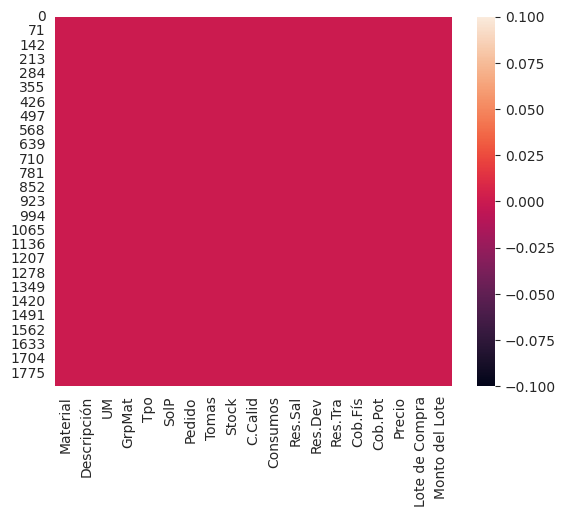

In [ ]:
#Veo en un grafico si hay nulos
sns.heatmap(df.isnull())

In [ ]:
#vemos la cantidad y porcentaje de datos nulos.
nulos = pd.DataFrame({'Cantidad' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (df.shape[0]) * (100)})
nulos

,Cantidad,Porcentaje
Material,0,0.0
Descripción,0,0.0
UM,0,0.0
GrpMat,0,0.0
Tpo,0,0.0
SolP,0,0.0
Pedido,0,0.0
Tomas,0,0.0
Stock,0,0.0
C.Calid,0,0.0


Verifico que mi DF no posee filas ni columnas duplicadas, por lo tanto puedo continuar con mi data frame original.

In [ ]:
# Imprimimos el tipo de datos de cada columna
print(df.dtypes)

Material            int64
Descripción        object
UM                 object
GrpMat             object
Tpo                object
SolP                int64
Pedido              int64
Tomas               int64
Stock             float64
C.Calid             int64
Consumos          float64
Res.Sal             int64
Res.Dev             int64
Res.Tra           float64
Cob.Fís           float64
Cob.Pot           float64
Precio            float64
Lote de Compra    float64
Monto del Lote    float64
dtype: object


In [ ]:
# Muestro los distintos grupos de Materiales que posee la empresa
df.GrpMat.unique()

array(['PROTECC. ', 'CABLE TRA', 'CABLE DIS', 'INSUMOS  ', 'HERRAMIE.',
       'HERRAJES ', 'ALUM.PUB.', 'AISLADOR ', 'MED.NUEV.', 'INSTRUME.',
       'SEGURIDAD', 'COMB.LUB.', 'COMUNIC. ', 'MORSETER.', 'ACCES CAS',
       'SOPORTES ', 'ROPA     ', 'TRAFO NUE', 'TRAFO MED', 'FORMULARI',
       'MOVILIDAD', 'MAT. TCT ', 'AISLANTES', 'TRAFO POT', 'TRAFO MAN',
       'LIBRERIA ', 'MED.REP. '], dtype=object)

In [ ]:
# Cuento cuantas matrículas posee cada grupo de materiales
df.GrpMat.value_counts()

GrpMat
SOPORTES     336
ROPA         249
PROTECC.     241
HERRAJES     184
MORSETER.    156
MAT. TCT     105
SEGURIDAD     79
TRAFO NUE     68
TRAFO MED     64
INSUMOS       64
ACCES CAS     45
CABLE DIS     40
MED.NUEV.     37
AISLADOR      35
ALUM.PUB.     31
COMUNIC.      31
HERRAMIE.     24
INSTRUME.     14
CABLE TRA     10
TRAFO MAN      6
MED.REP.       6
FORMULARI      5
MOVILIDAD      4
TRAFO POT      3
COMB.LUB.      1
AISLANTES      1
LIBRERIA       1
Name: count, dtype: int64

**VAMOS A REPRESENTAR DATOS EN LOS GRAFICOS**

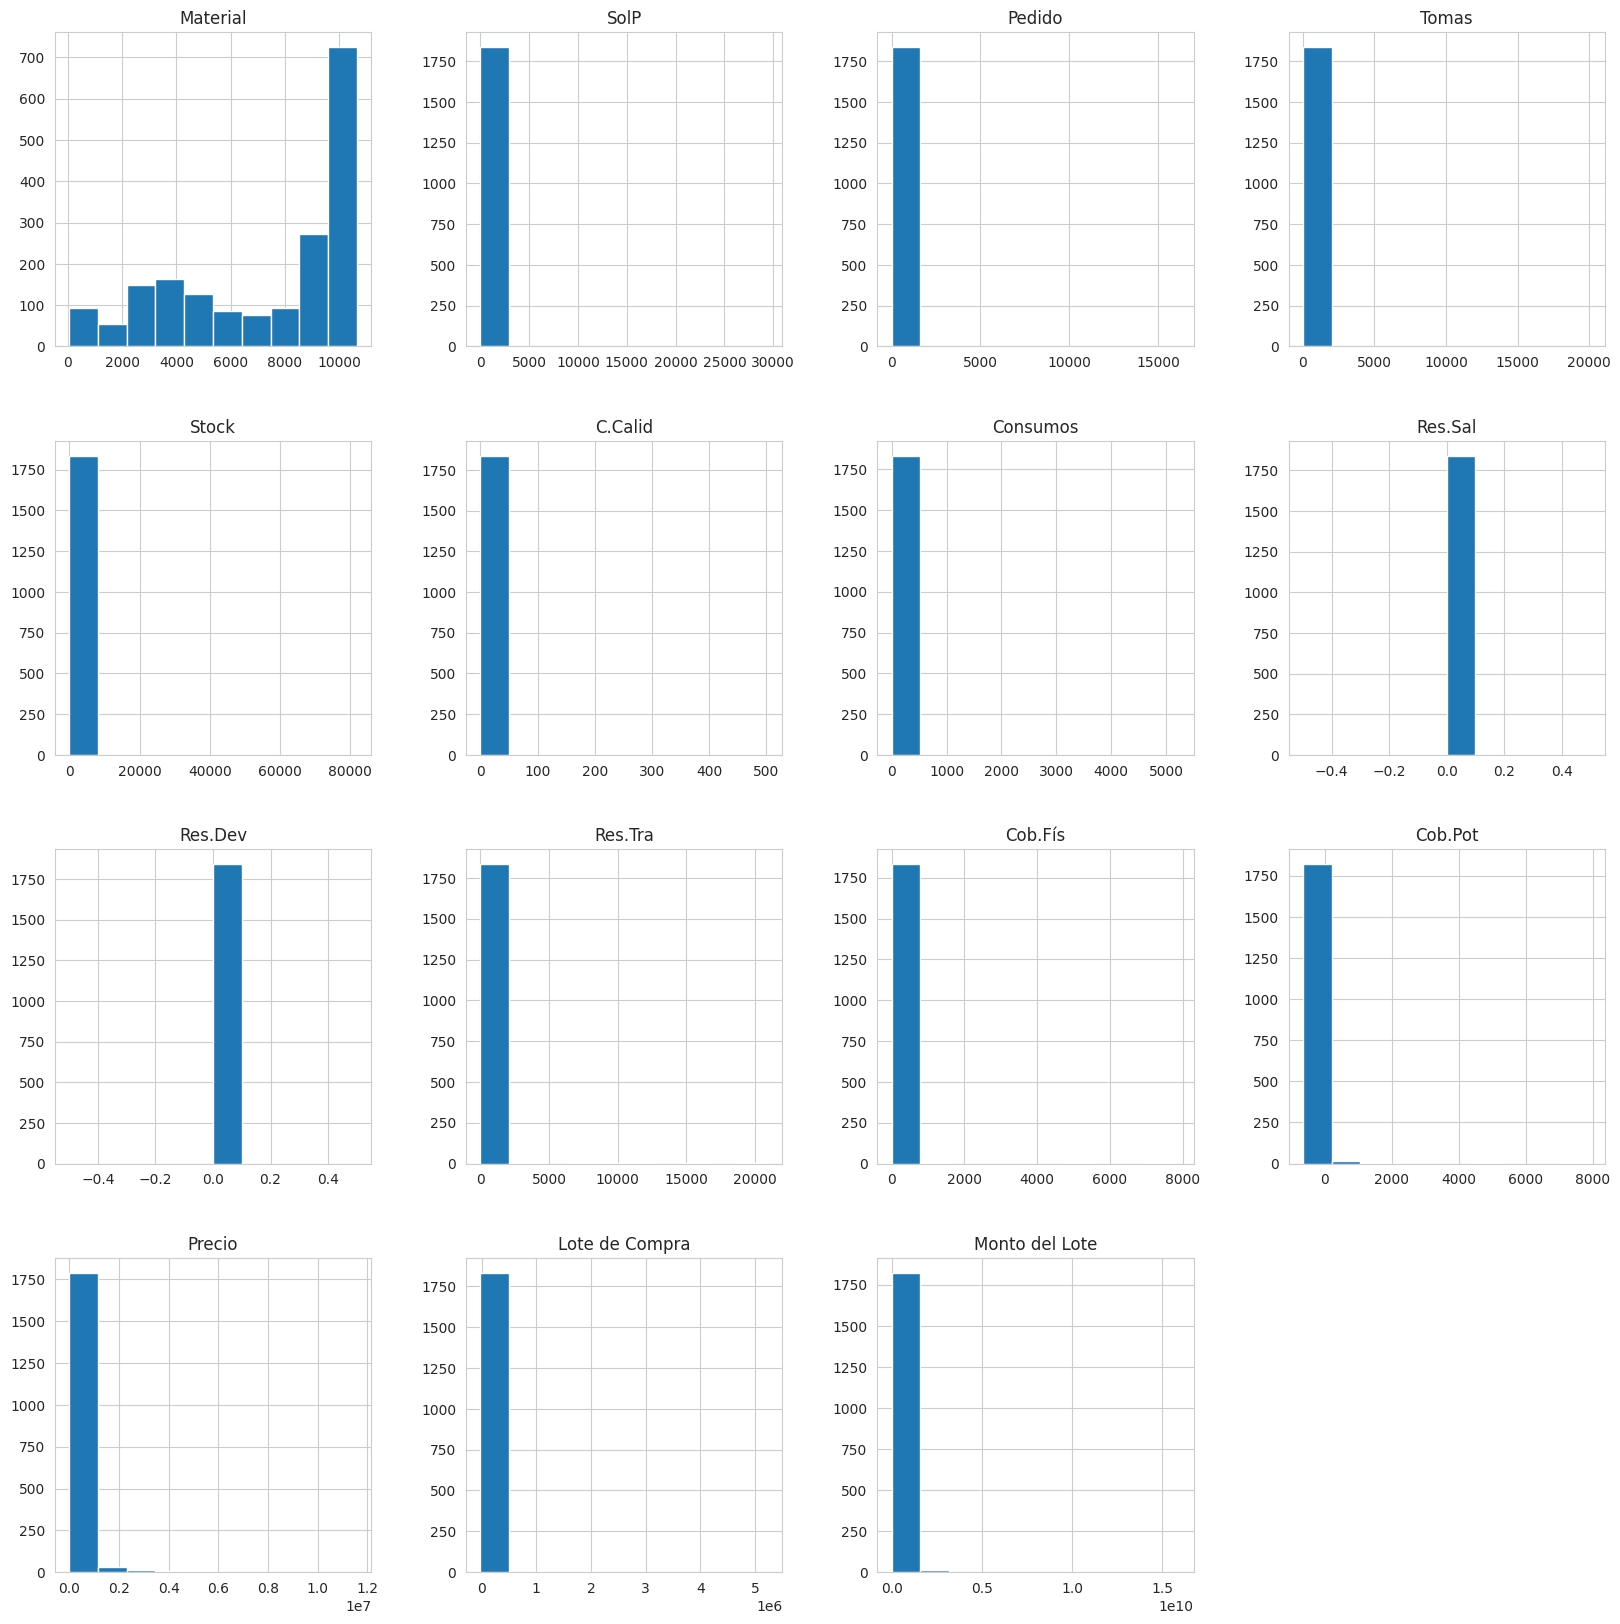

In [ ]:
#Realizamos un histograma para tener conocimiento global de el data Set de la empresa
p = df.hist(figsize = (20,20))

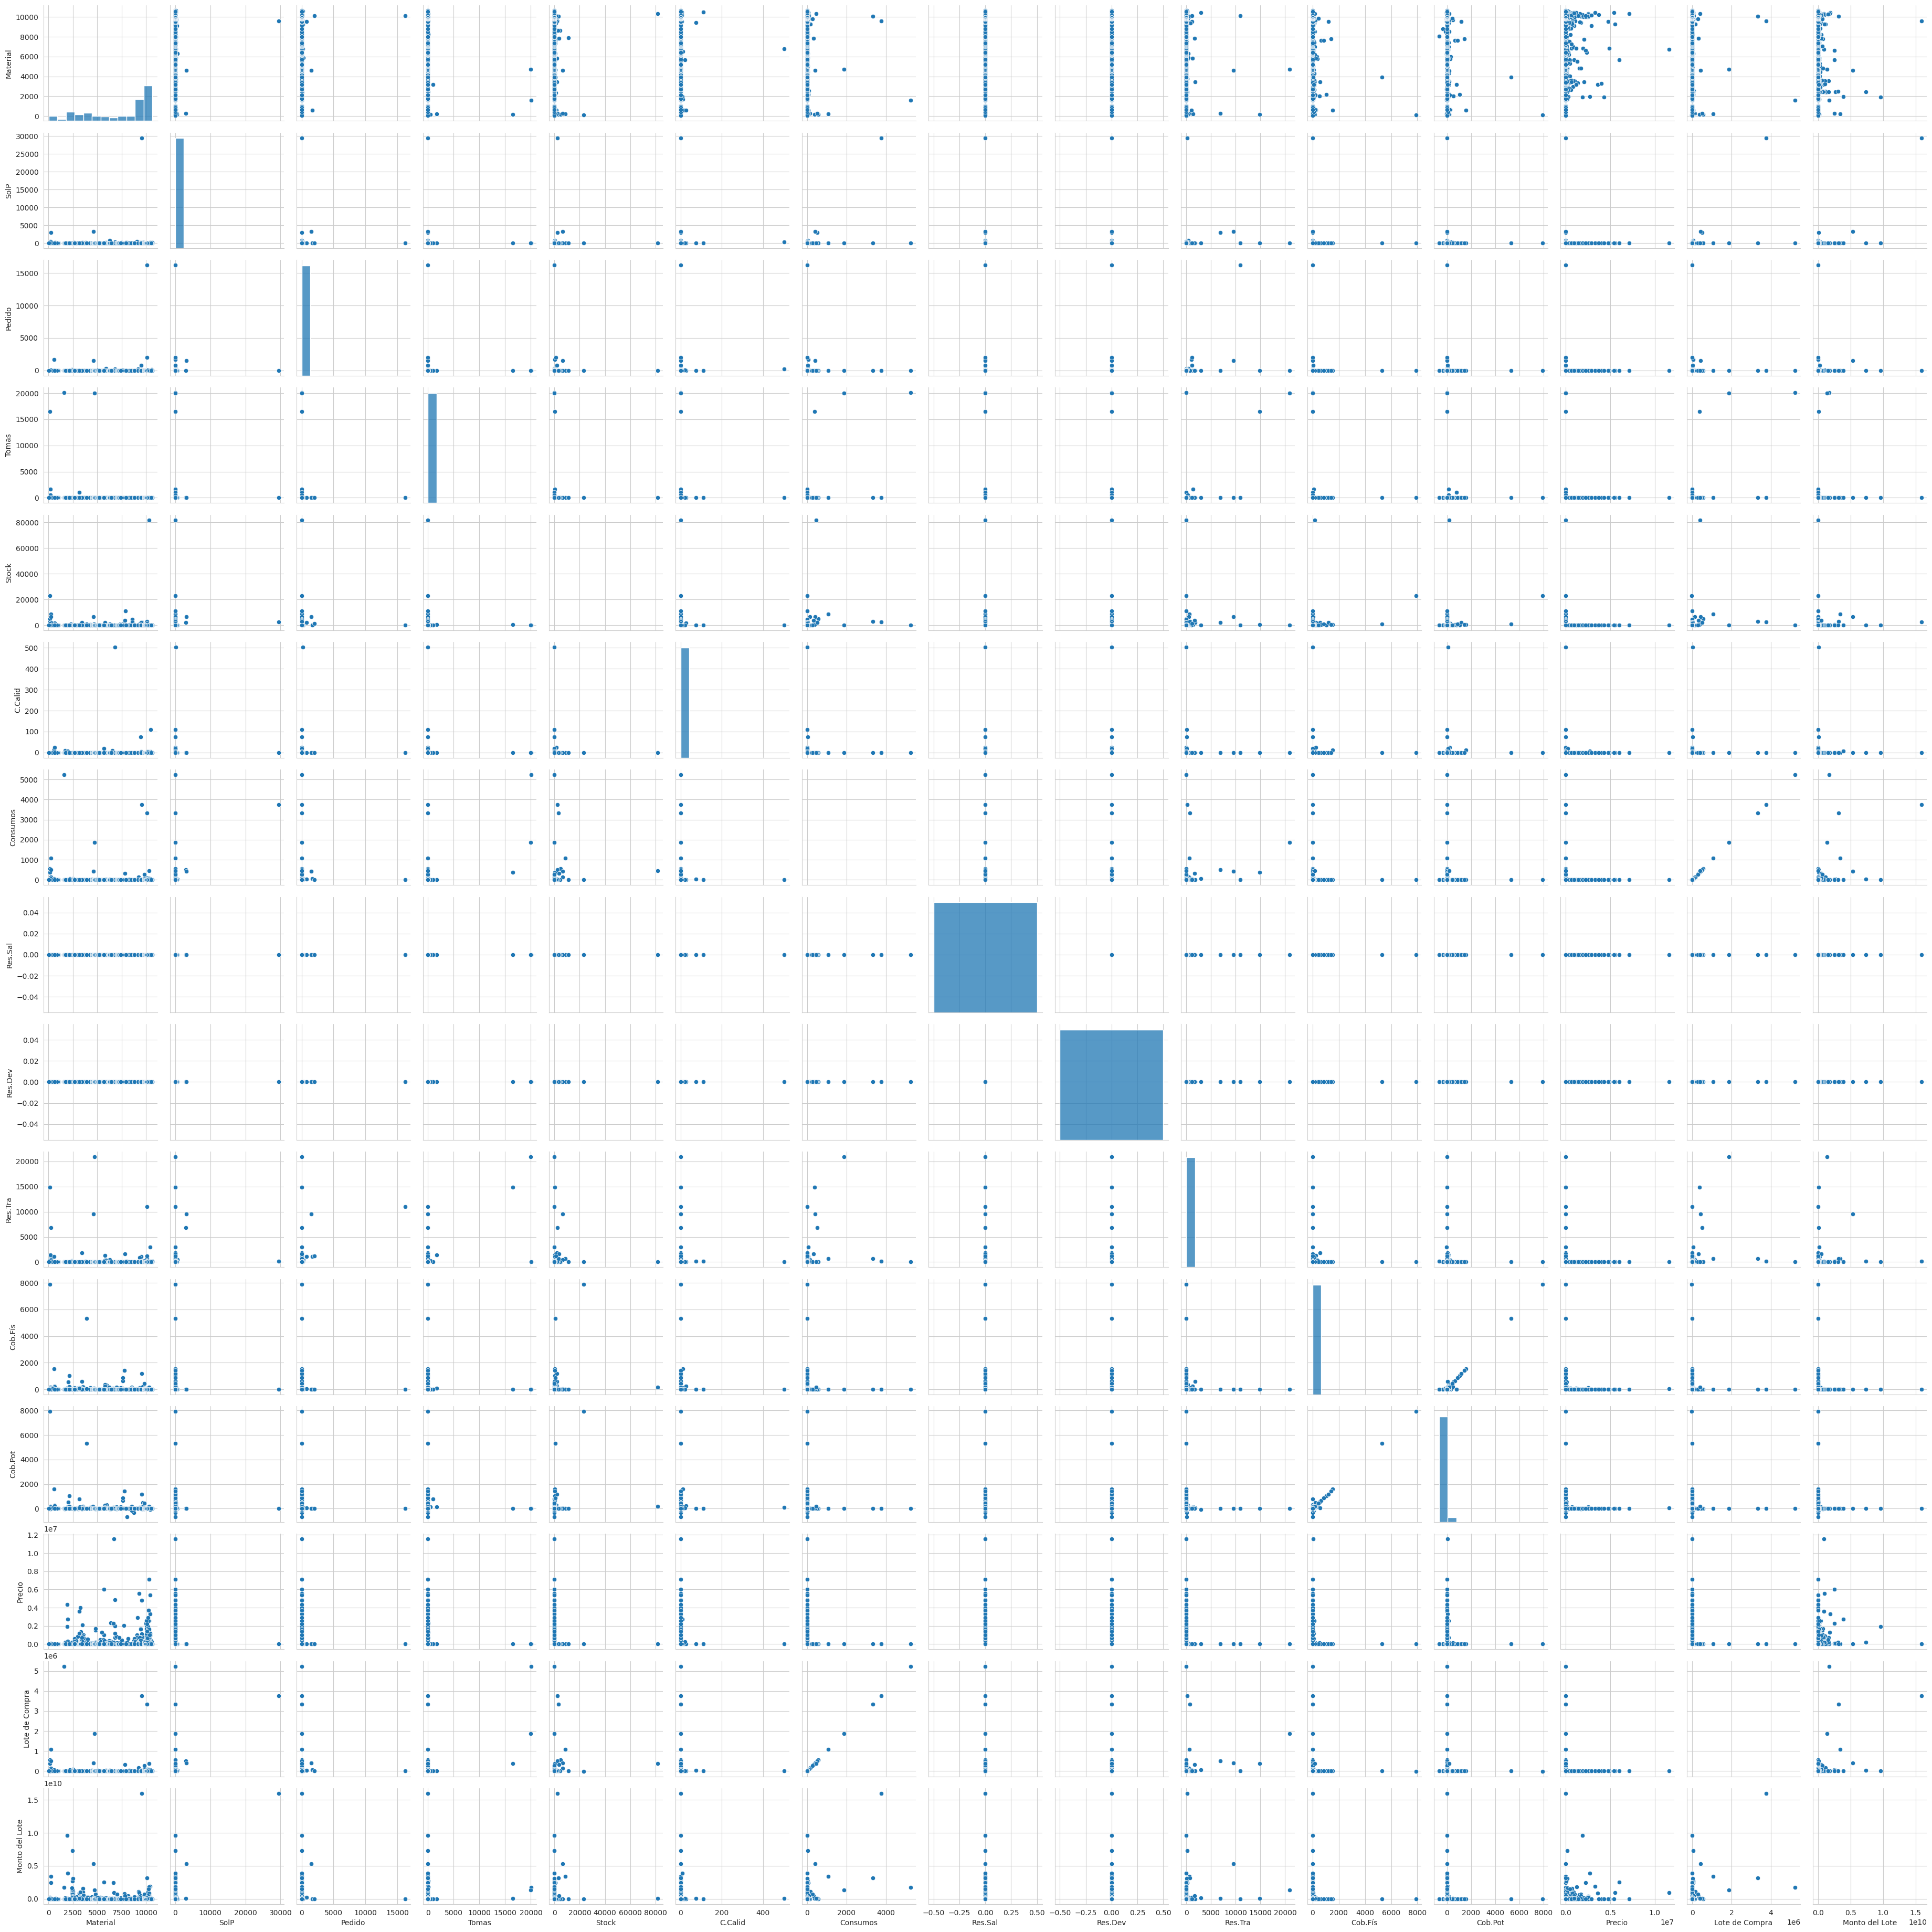

In [ ]:
# Mostramos la relacion de todas las variables de DF entre si. (DEMORA DE 29 MINUTOS EN EJECUTARSE)
sns.pairplot(df)
plt.show()

**En respuesta a las HIPOTESIS planteadas vamos a ir analizando y respondiendo.**

**HIPOTESIS 1**

**¿ Se puede identificar si los materiales PP brindados por esta base de datos estan bien calificados segun su consumo?**

Se divide el Dataset en dos grupos para resolver la Hipotesis N°1: Materiales  con consumo y sin consumo.

In [ ]:
df_Conconsumo = df[df['Consumos'] == 1] #Materiales con consumo.
df_Sinconsumo = df[df['Consumos'] == 0] #Materiales sin consumo.

Ahora voy a mostrar en un grafico visualizando entre los materiales que tiene consumo y los que no tienen consumo.

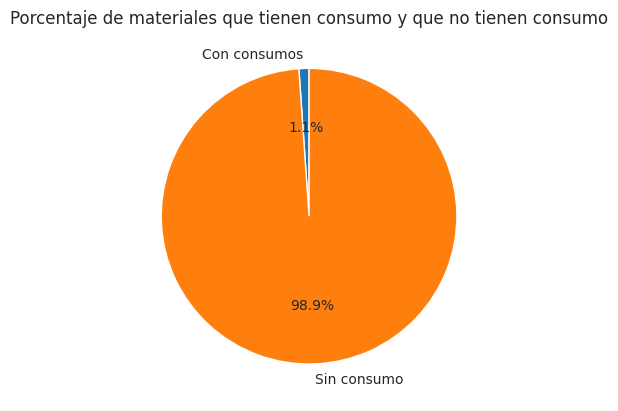

In [ ]:
labels = ['Con consumos', 'Sin consumo']
sizes = [len(df_Conconsumo), len(df_Sinconsumo)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de materiales que tienen consumo y que no tienen consumo')
plt.show()

Este grafico muestra los materiales PP, es decir materiales "por pedido" en funcion de los consumos habituales y no habituales. Por lo tanto este grafico confirma,  que están bien clasificados los materiales PP ya quer tienen un bajo consumo.

**HIPOTESIS 2**

**¿ Se cubre el consumo de materiales con el stock existente y las compras emitidas?**

Para poder abordar esta consulta, partimos de la base que cuando la cobertura potencial es mayor al stock se cubre el consumo.
Y cuando la cobertura Potencial es menor al stock, el mismo se genera un quiebre de stock.

Recordamos a que le llamamos cobertura potencial: ( 16 Cob_Pot) representa el tiempo en meses que demorar un material en disponer su accion para contar con el. Si  se compra ese material y tomando en cuenta la demora en la entrega, ese numero representará por cuantos meses estaría cubierto en stock. Y de ahi analizamos si tenemos stock optimo o bajo stock, tomando una referencia. El rango de cobertura potencial de materiales por pedido (PP) es de 3 meses.


In [ ]:
# Comenzamos dividiendo el DafaFrame en dos grupo
df_Bajo_Stock = df[df['Cob.Pot'] < df['Stock']] # grupo de materiales que posee una Cobertura Potencial menor al Stock (Baja cobertura)
df_Stock_Optimo = df[df['Cob.Pot'] >= df['Stock']] # grupo de materiales que posee una Cobertura Potencial igual o mayor al Stock (Cobertura óptima)

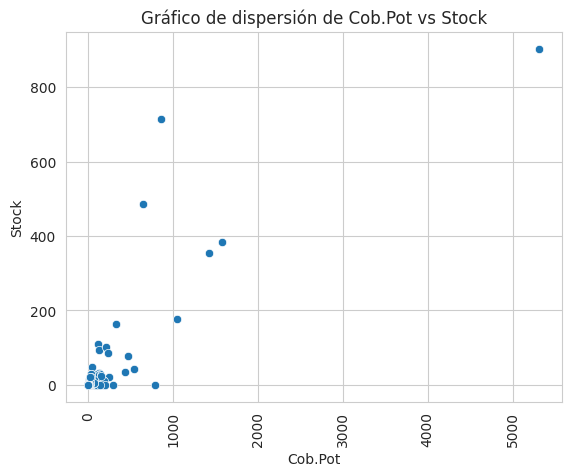

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Cob.Pot', y='Stock', data=df_Stock_Optimo)
plt.xticks(rotation=90)
plt.title('Gráfico de dispersión de Cob.Pot vs Stock')
plt.show()

En resumen, este gráfico proporciona una visualización de la relación entre la cobertura potencial y el stock, y entender cómo estas variables están relacionadas. En conclusion a este grafico vemos que las variables se centran con bajo stock y por lo tanto baja cobertura potencial. Viendo que es  proporcianal su cobertura al stock que tienen.

Voy a presentar en un grafico los materiales que tienen bajo stock.

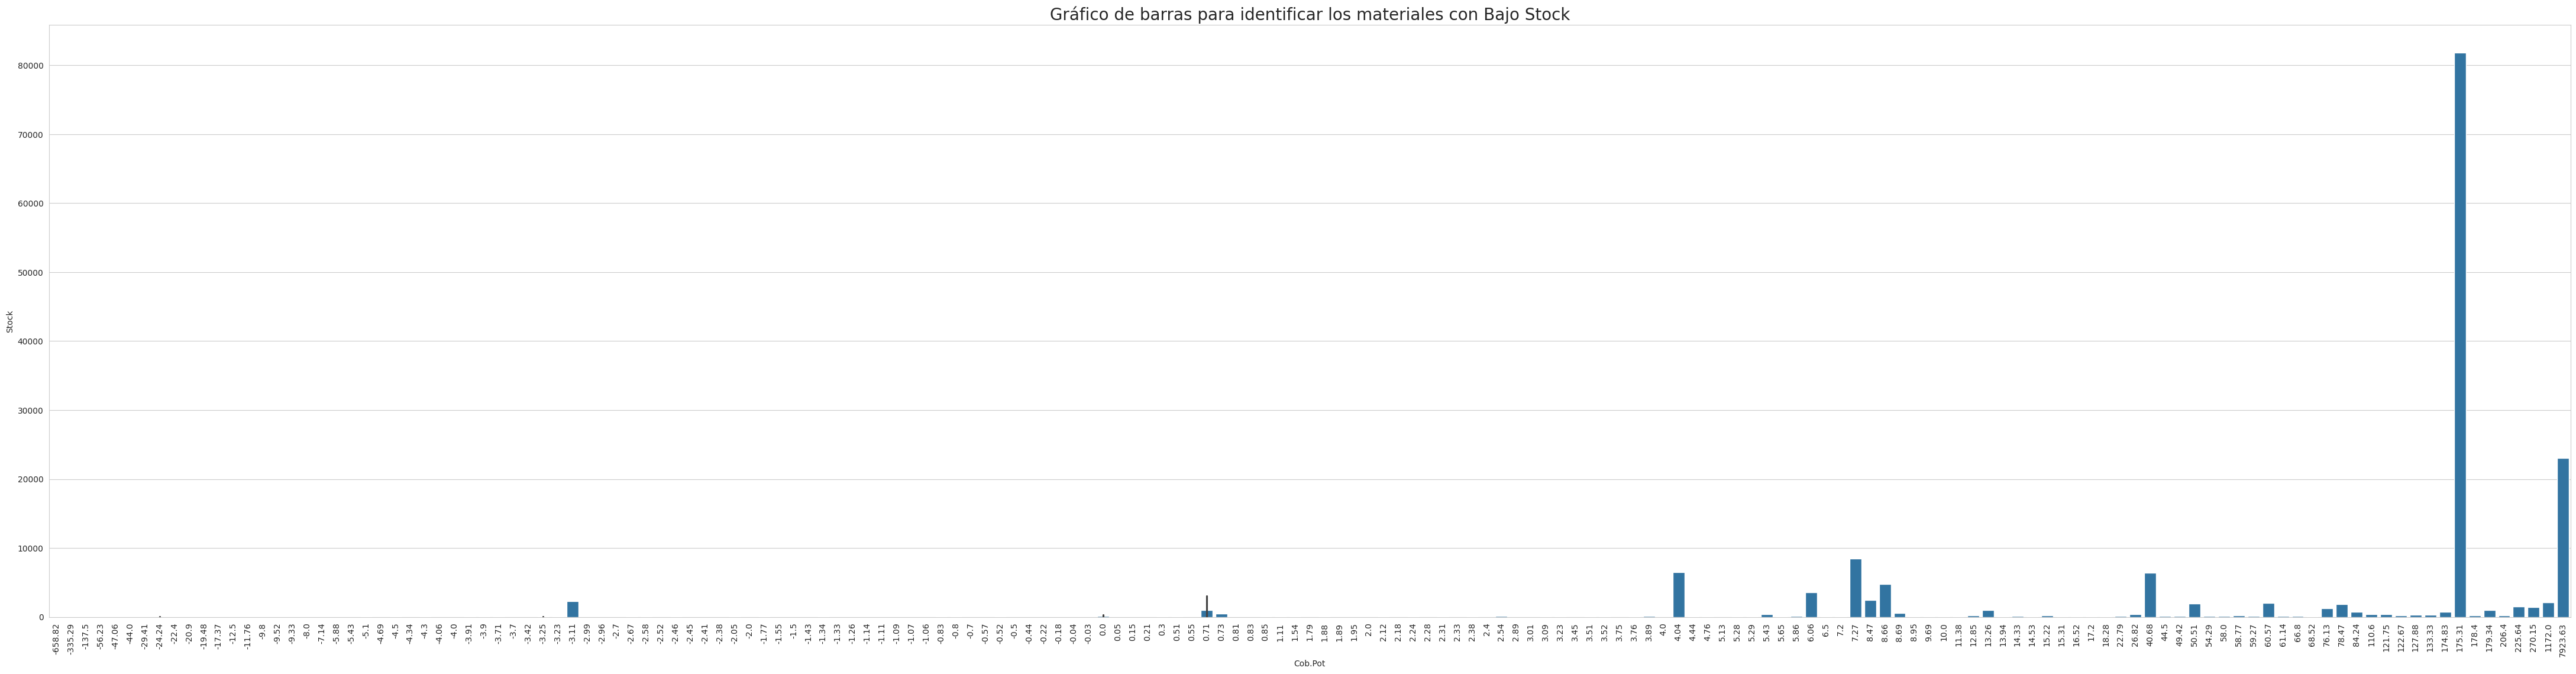

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para identificar los materiales con Bajo Stock
plt.figure(figsize=(55, 13))
sns.barplot(y='Stock', x='Cob.Pot', data=df_Bajo_Stock)

# Agrega el título al gráfico
plt.title('Gráfico de barras para identificar los materiales con Bajo Stock', fontsize=20)

plt.xticks(rotation='vertical')
plt.show()

En el siguiente grafico vemos los materiales con stock optimo.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155],
 [Text(0, 0, '0.0

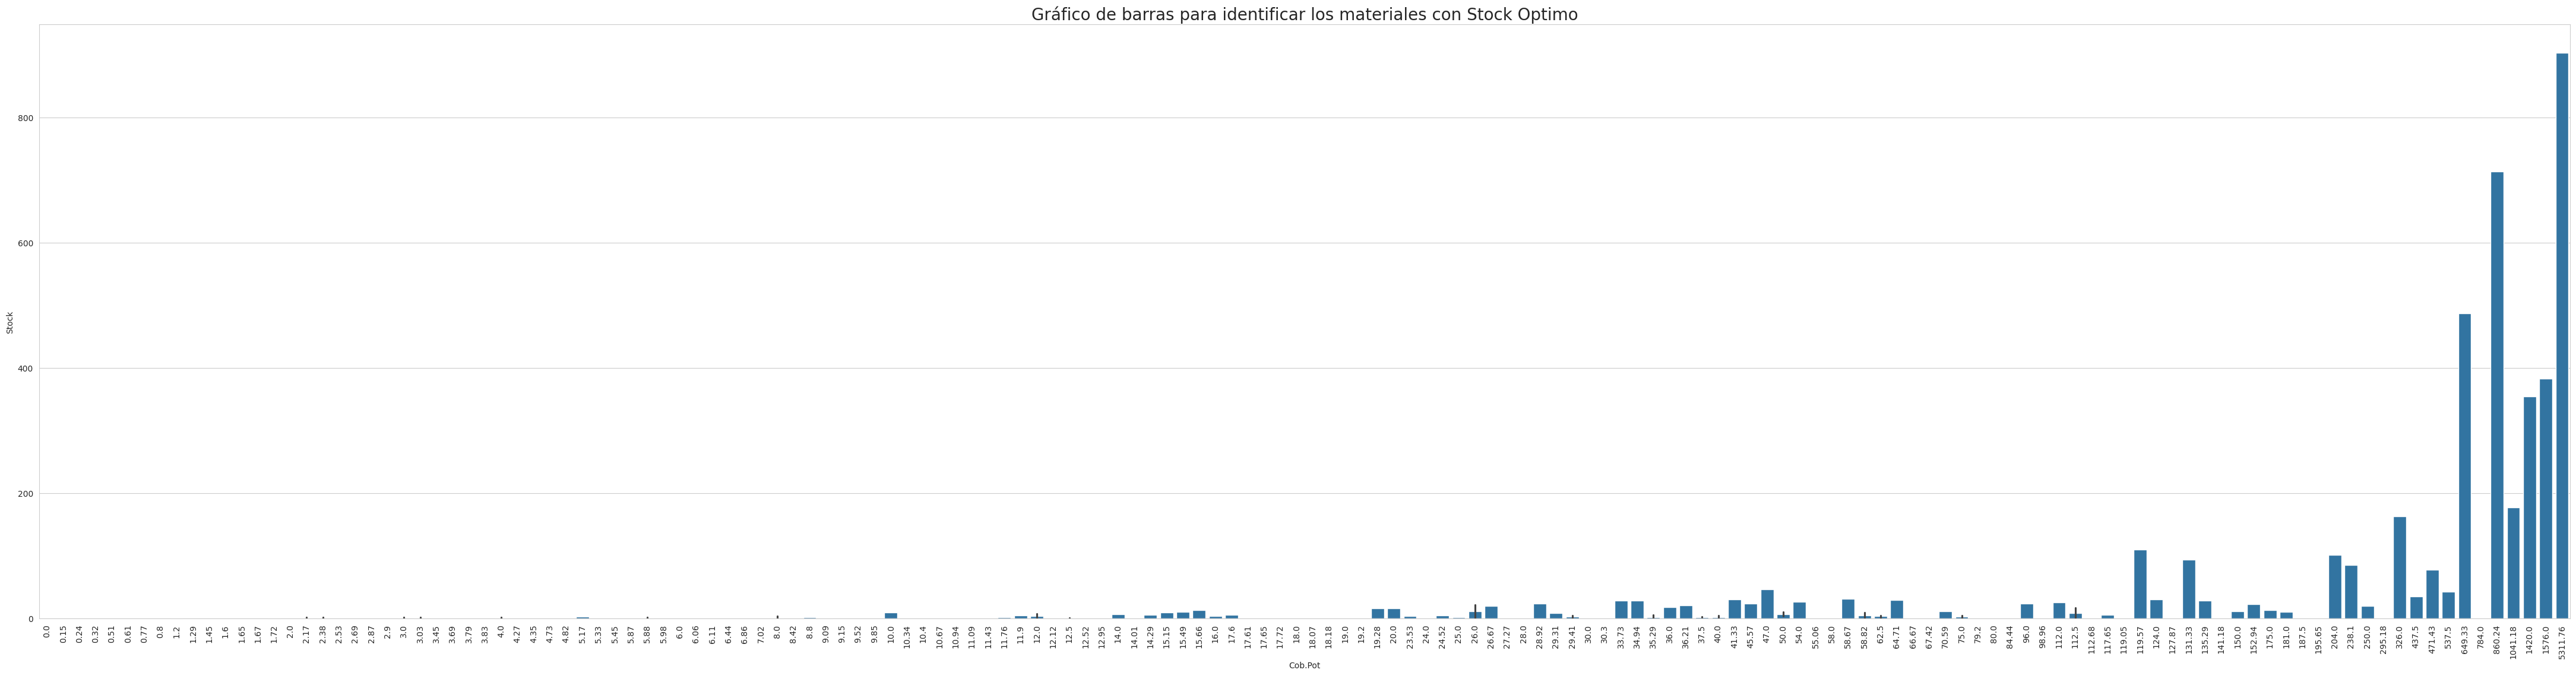

In [ ]:
#Gráfico de barras para identificar los materiales con Stock Optimo
plt.figure(figsize=(55,13))
sns.barplot(y='Stock',x='Cob.Pot',data=df_Stock_Optimo)
# Agrega el título al gráfico
plt.title('Gráfico de barras para identificar los materiales con Stock Optimo', fontsize=20)

plt.xticks(rotation='vertical')

En el siguiente grafico vamos a unir ambas variables para ver como se muestran los materiales con Bajo Stock y Stock optimo.

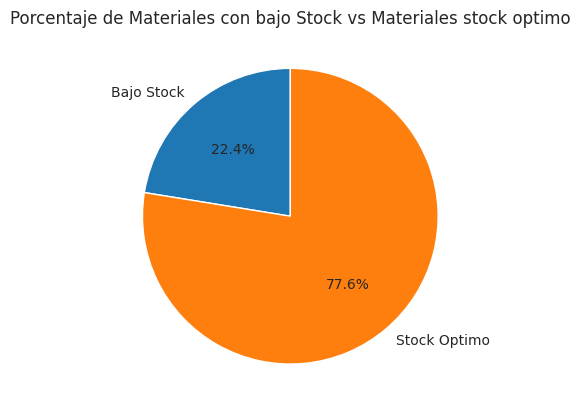

In [ ]:
labels = ['Bajo Stock', 'Stock Optimo']
sizes = [len(df_Bajo_Stock), len(df_Stock_Optimo)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de Materiales con bajo Stock vs Materiales stock optimo')
plt.show()

Con estas visualizaciones podemos mostrar las cobertura de los materiales La conclusion de la Hipotesis 2, es que el 77,6% tiene stock optimo, por lo que cubre con las necesidades de la empresa y el 22,4% se debe analizar de efectuar alguna accion para cubrir el stock, por ejemplo efectuar compras adicionales.

**HIPOTESIS 3**

 **¿Cual es el Grupo de Material que tiene mayor importancia dentro de la empresa?**



En el siguiente grafico se presenta los materiales con mayor stock, separados por grupo de material.

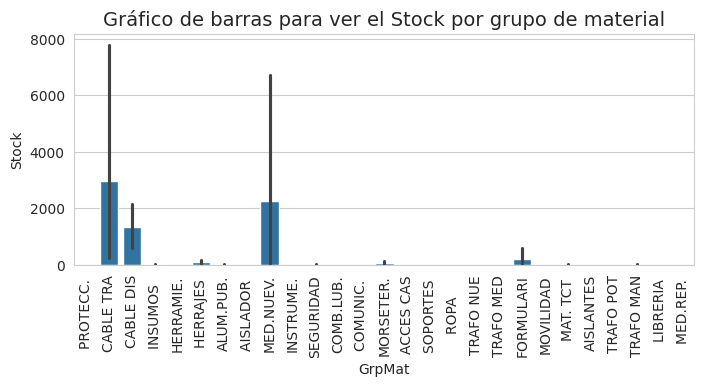

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(x='GrpMat', y='Stock', data=df)

# Configura el título del gráfico
plt.title('Gráfico de barras para ver el Stock por grupo de material', fontsize=14)

plt.xticks(rotation=90)
plt.show()

Podemos observar que lo grupos mas representativos en cantidades de Stock son de Cables Tra. y los Medidores Nuevos.

En este grafico anterior resolvemos la HIPOTESIS n° 3,  y en el siguiente grafico podemos ver el stock que tiene cada material dentro de Grupo de material.

Tomamos uno de los grupos de materiales mas importantes, como los Cables.

In [ ]:
# Vamos a realizar un gráfico interactivo para mostrar como se compone el grupo de materiales que posee mayor stock, material por material
# Importar librerias
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a "Cable Dist"
df_Cables = df[df['GrpMat'] == 'CABLE DIS']

In [ ]:
import plotly.express as px

# Crear el gráfico de barras utilizando Plotly Express
fig = px.bar(df_Cables, x='Descripción', y='Stock')

# Agregar título al gráfico
fig.update_layout(title='Gráfico de barras: Stock por Descripción')

# Mostrar el gráfico
fig.show()

Lo que vemos en este grafico es la distribución del stock para diferentes descripciones de cables.

En el eje x, cada barra representa una descripción específica de un cable.
En el eje y, se muestra la cantidad de stock correspondiente a cada descripción de cable.
Este tipo de gráfico es útil para visualizar la variación del stock entre diferentes tipos de cables, lo que puede ayudarte a identificar qué tipos de cables tienen más o menos stock en comparación con otros.

Ahora pasamos a resolver la siguiente:

**HIPOTESIS 4**





**¿Tienen mayores consumos los materiales que tienen mayor stock?**

Para conseguir este dato vamos a utilizar un grafico matplotlib.pyplot, para observar su consumo segun el Grupo de material.

<ipython-input-18-5a15c73475c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GrpMat', y='Consumos', data=df, errorbar=None, palette='viridis')


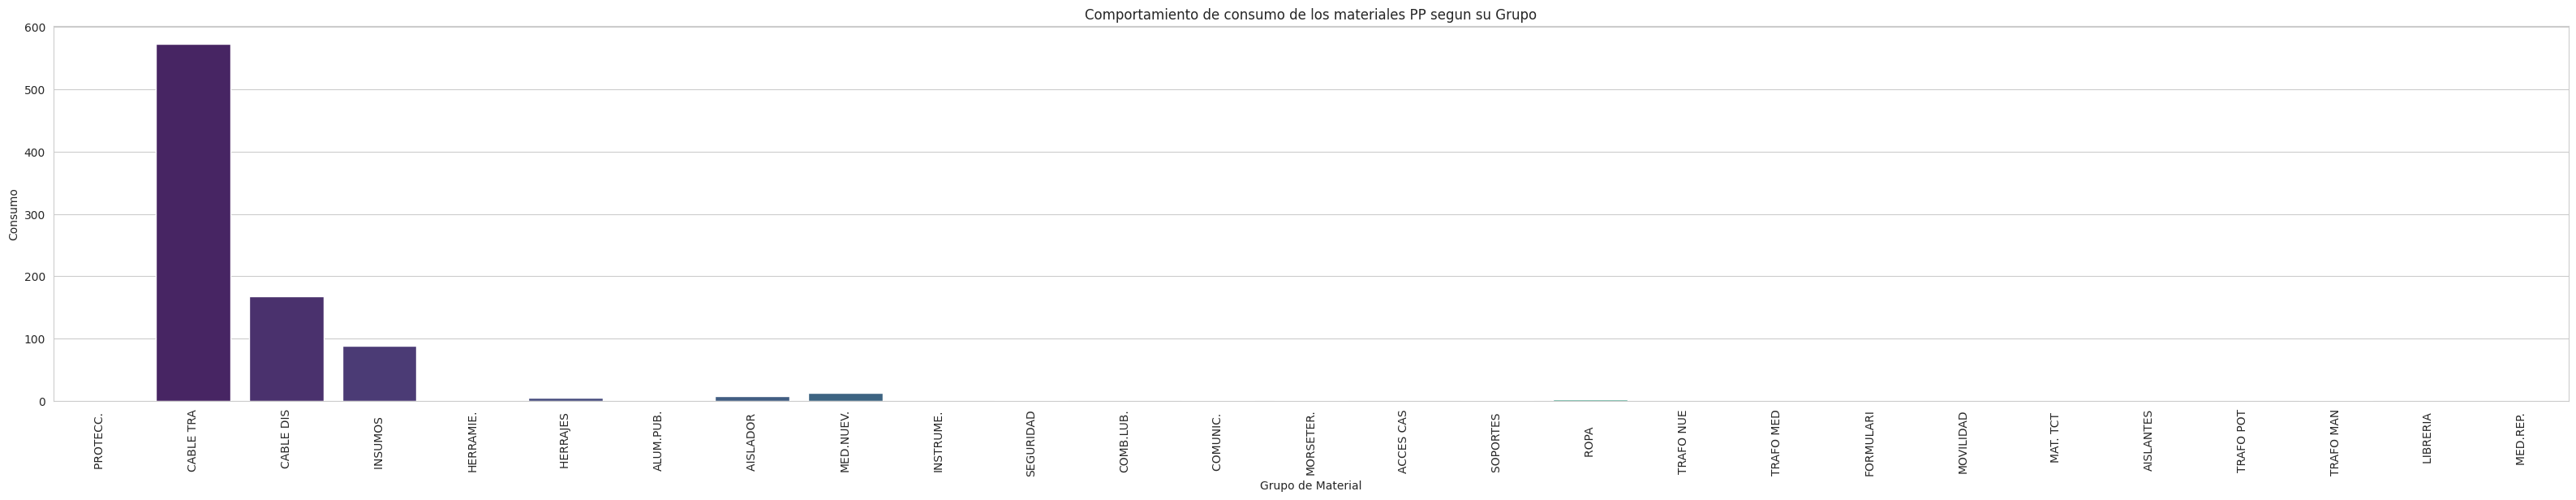

In [ ]:
plt.figure(figsize=(40, 6))
sns.barplot(x='GrpMat', y='Consumos', data=df, errorbar=None, palette='viridis')
plt.title('Comportamiento de consumo de los materiales PP segun su Grupo')
plt.xlabel('Grupo de Material')
plt.ylabel('Consumo')
plt.xticks(rotation='vertical')
plt.show()

La conclusion de siguiente grafico, es que existe una relacion directa entre consumo de los materiales (grupo de Materiales) y stock fisico (segun Grafico de la Hipotesis 3).
Es decir que la empresa no se encuentra sobrestockeada sobre dichos materiales que se destacan, sino que debe tener mayor stock de esos materiales por el consumto que tienen.

**ENTRENANDO MI DATASET** **METRICAS**

Ahora empezamos a mostrar la variables

In [ ]:
#Crear un DataFrame eliminando las columnas Objets
df1= df.drop(columns=['Descripción','UM','GrpMat','Tpo'])

In [ ]:
# veo que mi df2 sean solo valores de tipo numerico
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Material        1840 non-null   int64  
 1   SolP            1840 non-null   int64  
 2   Pedido          1840 non-null   int64  
 3   Tomas           1840 non-null   int64  
 4   Stock           1840 non-null   float64
 5   C.Calid         1840 non-null   int64  
 6   Consumos        1840 non-null   float64
 7   Res.Sal         1840 non-null   int64  
 8   Res.Dev         1840 non-null   int64  
 9   Res.Tra         1840 non-null   float64
 10  Cob.Fís         1840 non-null   float64
 11  Cob.Pot         1840 non-null   float64
 12  Precio          1840 non-null   float64
 13  Lote de Compra  1840 non-null   float64
 14  Monto del Lote  1840 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 215.8 KB


In [ ]:
# Vamos a trabajar con mi nuevo DF donde todas las variables son numéricas
df1

,Material,SolP,Pedido,Tomas,Stock,C.Calid,Consumos,Res.Sal,Res.Dev,Res.Tra,Cob.Fís,Cob.Pot,Precio,Lote de Compra,Monto del Lote
0,429,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,41.56,0.00,0.000000e+00
1,139,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,41.31,0.00,0.000000e+00
2,143,0,0,0,0.0,0,15.00,0,0,0.0,0.00,0.00,1224.56,14985.00,1.835003e+07
3,144,60,0,0,23077.0,0,2.92,0,0,0.0,7903.08,7923.63,22.41,-20159.92,-4.517838e+05
4,154,0,0,0,500.0,0,38.42,0,0,472.0,13.01,0.73,4785.86,37881.58,1.812959e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,10538,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,0.01,0.00,0.000000e+00
1836,10539,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,0.01,0.00,0.000000e+00
1837,10540,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,0.01,0.00,0.000000e+00
1838,10541,0,0,0,0.0,0,0.00,0,0,0.0,0.00,0.00,0.01,0.00,0.000000e+00


In [ ]:
#Generamos nuestra x
x = df1.iloc[:, [4, 6]].values

In [ ]:
x.tolist()

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 15.0],
 [23077.0, 2.92],
 [500.0, 38.42],
 [0.0, 5241.24],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [20.0, 0.75],
 [0.0, 0.0],
 [0.0, 0.0],
 [6.0, 0.42],
 [0.0, 0.92],
 [12.0, 1.0],
 [0.0, 5.17],
 [3.0, 0.0],
 [0.0, 0.67],
 [0.0, 3.67],
 [140.0, 5.0],
 [166.0, 3.42],
 [6.0, 0.17],
 [57.0, 2.83],
 [2904.0, 0.0],
 [1.0, 0.0],
 [0.0, 0.0],
 [1.0, 0.08],
 [428.0, 373.67],
 [4795.0, 551.25],
 [3.0, 1.5],
 [0.0, 3.58],
 [0.0, 9.67],
 [1.0, 0.08],
 [0.0, 2.08],
 [83.0, 0.0],
 [30.0, 1.17],
 [0.0, 0.0],
 [0.0, 0.0],
 [486.0, 0.0],
 [588.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 0.0],
 [6.0, 1.83],
 [0.0, 0.5],
 [6.0, 0.0],
 [0.0, 1.17],
 [0.0, 0.0],
 [0.0, 0.92],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 1.25],
 [0.0, 0.0],
 [1.0, 0.08],
 [48.0, 0.0],
 [59.0, 3.33],
 [0.0, 0.0],
 [2.0, 0.0],
 [0.0, 0.33],
 [0.0, 1.83],
 [327.0, 0.0],
 [0.0, 0.0],
 [1.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 4.5],
 [1.0, 0.0],
 [0.0, 2.83],
 [12.0, 3.42],
 [383.0, 0.25],
 [4

Nos quedamos con las variables 4 y 6 de conjunto de datos, las cuales corresponden al Stock de materiales y consumo de los mismos.

VARIABLE SINTETICAS

In [ ]:
#Voy a eliminar variables, para luego generar la variable sintentica
df5= df.drop(columns=['Material', 'Descripción','GrpMat', 'UM', 'Tpo','C.Calid', 'Res.Sal', 'Res.Dev','Res.Tra', 'Precio', 'Lote de Compra','Monto del Lote'])

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SolP      1840 non-null   int64  
 1   Pedido    1840 non-null   int64  
 2   Tomas     1840 non-null   int64  
 3   Stock     1840 non-null   float64
 4   Consumos  1840 non-null   float64
 5   Cob.Fís   1840 non-null   float64
 6   Cob.Pot   1840 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 100.8 KB


In [ ]:
df5.columns

Index(['SolP', 'Pedido', 'Tomas', 'Stock', 'Consumos', 'Cob.Fís', 'Cob.Pot'], dtype='object')

In [ ]:
# Voy a crear una nueva variable sintética sumando las columnas "Pedido", "Tomas" y "SolP"
df5['Variable_sintetica'] = df5['Pedido'] + df5['Tomas']+ df5['SolP']

In [ ]:
# Verifico el DataFrame con la nueva variable sintética
print(df5.head())

   SolP  Pedido  Tomas    Stock  Consumos  Cob.Fís  Cob.Pot  \
0     0       0      0      0.0      0.00     0.00     0.00   
1     0       0      0      0.0      0.00     0.00     0.00   
2     0       0      0      0.0     15.00     0.00     0.00   
3    60       0      0  23077.0      2.92  7903.08  7923.63   
4     0       0      0    500.0     38.42    13.01     0.73   

   Variable_sintetica  
0                   0  
1                   0  
2                   0  
3                  60  
4                   0  


In [ ]:
#En la informacion de mi DF ya figura mi nueva variable
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SolP                1840 non-null   int64  
 1   Pedido              1840 non-null   int64  
 2   Tomas               1840 non-null   int64  
 3   Stock               1840 non-null   float64
 4   Consumos            1840 non-null   float64
 5   Cob.Fís             1840 non-null   float64
 6   Cob.Pot             1840 non-null   float64
 7   Variable_sintetica  1840 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 115.1 KB


Conclusion: Vemos que se creo una variable sintetica sumando tres variables Solp, Pedido y tomas, estas tres variables estan relacionadas a la cobertura potencial que puede tener un material, hacen referencia al volumen de stock que hay pero que fisicamente no está.

In [ ]:
#Preprocesamiento, veo de sacar una variable para mi X
X = df5.drop('Cob.Fís', axis=1)
y = df5['Cob.Fís']

In [ ]:
X.head()

,SolP,Pedido,Tomas,Stock,Consumos,Cob.Pot
0,0,0,0,0.0,0.00,0.00
1,0,0,0,0.0,0.00,0.00
2,0,0,0,0.0,15.00,0.00
3,60,0,0,23077.0,2.92,7923.63
4,0,0,0,500.0,38.42,0.73


In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
xx = pd.DataFrame(X_train)

In [ ]:
xx.describe()

,SolP,Pedido,Tomas,Stock,Consumos,Cob.Pot
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,28.187500,4.799592,40.016984,129.356318,13.848417,18.630829
std,772.427139,72.838851,855.611848,2266.596359,198.950086,258.031525
min,0.000000,0.000000,0.000000,0.000000,0.000000,-658.820000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000
max,29465.000000,2000.000000,20100.000000,81814.000000,5241.240000,7923.630000


In [ ]:
X_train

,SolP,Pedido,Tomas,Stock,Consumos,Cob.Pot
526,0,0,0,0.0,0.00,0.00
588,0,0,0,487.0,0.75,649.33
949,0,3,0,0.0,0.00,0.00
1630,0,0,0,0.0,0.00,0.00
1718,0,0,0,0.0,7.00,0.00
...,...,...,...,...,...,...
1130,0,0,0,0.0,0.00,0.00
1294,0,0,0,0.0,0.00,0.00
860,0,0,0,2.0,0.00,0.00
1459,0,0,0,0.0,0.00,0.00


# **MODELO**


EL modelo que analizamos es de Regresion Lineal.  Este modelo vamos a utilizar para diagnosticar la informacion de la Empresa respecto al consumo de los materiales PP (por pedido).  Es decir vamos a buscar predecir datos y analizar cual es la mejor metrica.



Primero borraremos los outliers para evitar distorsiones.

In [ ]:
# Queremos limpiar de la variable 'Cob_Fis'los outliers

Q1 = df['Consumos'].quantile(0.25)
Q3 = df['Consumos'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Se muestran en las filas los outliers en las columnas consumos
outliers_mask = (df['Consumos'] < Q1 - 1.5 * IQR) | (df['Consumos'] > Q3 + 1.5 * IQR)

In [ ]:
# Se observan los outliers y se eliminan. Se arma un nuevo df, el mismo se llamará dfconsumo
dfconsumo = df[~outliers_mask]

In [ ]:
# Recordamos nuestro df original
print("Cantidad de filas y columnas:", df.shape)

Cantidad de filas y columnas: (1840, 19)


In [ ]:
#Vemos como quedo nuestro nuevo df
print("Cantidad de filas y columnas:", dfconsumo.shape)

Cantidad de filas y columnas: (1492, 19)


Vamos analizar cada variable del df y empezamos a sacar conclusiones.
Marcamos variables dependientes como el CONSUMO y el resto como variables independientes.



**División de los datos**

In [ ]:
X=df.drop("Consumos",axis=1)
Y=df["Consumos"]

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = dfconsumo[['Stock', 'C.Calid', 'Tomas', 'Cob.Fís', 'Cob.Pot']]
y = dfconsumo['Consumos']

In [ ]:
# Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicción en datos de entrenamiento y prueba
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

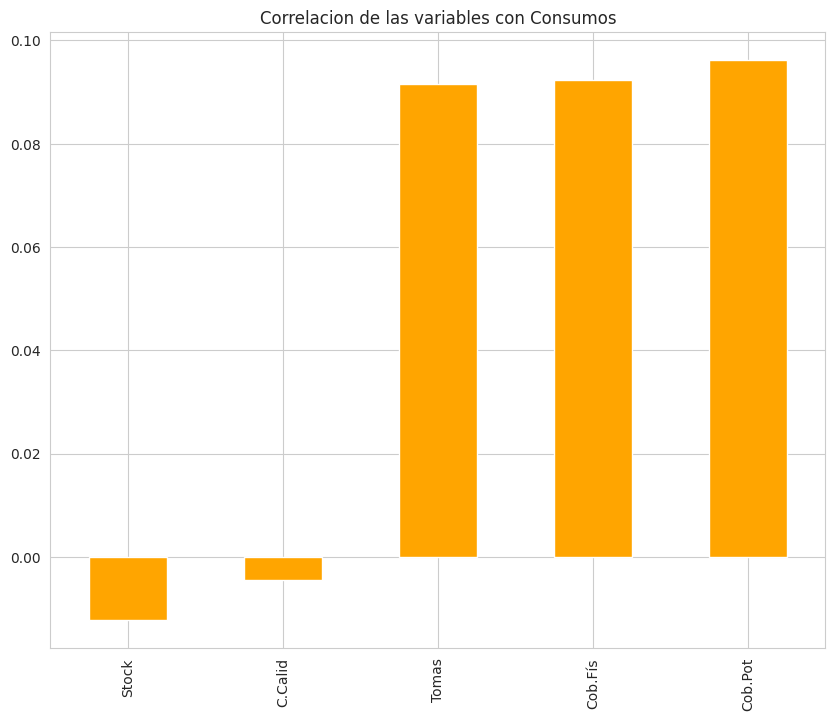

In [ ]:
X.corrwith(dfconsumo.Consumos).plot(kind='bar', grid=True, figsize=(10, 8)
, title="Correlacion de las variables con Consumos",color="orange");

Vemos que tanto las variables de Stock y C.Calidad puede ser no muy util para predecir, pero si vemos una situacion distinta sobre las variables Tomas, Cobertura Fisica y Cobertura Potencial. Estas si nos ayudarian a predecir por su gran impacto por coeficinentes significativos.  

**ARBOL DE DESICION**

In [ ]:
# Crear el modelo de árbol de regresión
tree_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Entrenar el modelo de árbol de regresión
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predicciones en el conjunto de entrenamiento y prueba utilizando el árbol de regresión
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento
train_score = tree_regressor.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento: {:.4f}'.format(train_score))

Puntaje en conjunto de entrenamiento: 0.6160


In [ ]:
# Calcular y imprimir el puntaje de prueba
test_score = tree_regressor.score(X_test, y_test)
print('Puntaje en conjunto de prueba: {:.4f}'.format(test_score))

Puntaje en conjunto de prueba: 0.4388


Un puntaje de 0.6160 sugiere que el modelo explica aproximadamente el 61.60% de la variabilidad de los datos de entrenamiento. No es un ajuste perfecto, pero indica que el modelo ha capturado una cantidad razonable de la estructura de los datos de entrenamiento.El puntaje de prueba indica que el modelo explica aproximadamente el 43.88% de la variabilidad de los datos de prueba. El puntaje es menor que el de entrenamiento, lo cual es común, ya que el modelo generalmente se ajusta mejor a los datos con los que fue entrenado que a los datos nuevos. El modelo no está tan bien ajustado a los datos de prueba como lo está a los datos de entrenamiento, lo que podría ser un indicador de que el modelo está sobreajustado (overfitting) a los datos de entrenamiento y no generaliza bien a datos. Otra posibilidad es que el modelo sea relativamente simple y no esté capturando toda la variabilidad de los datos. En este caso, vamos aprobar con otros modelos.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Calcular métricas en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


In [ ]:

# Calcular métricas en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Mostrar métricas
print("Métricas en el conjunto de entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R^2:", train_r2)
print("\nMétricas en el conjunto de prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)

Métricas en el conjunto de entrenamiento:
MSE: 0.004434847172147344
MAE: 0.024222747662972416
R^2: 0.6160064842169246

Métricas en el conjunto de prueba:
MSE: 0.009795913871696161
MAE: 0.04265004288277086
R^2: 0.4387802928384048


In [ ]:
# Calcular los errores en el conjunto de prueba
errors = y_test - y_test_pred

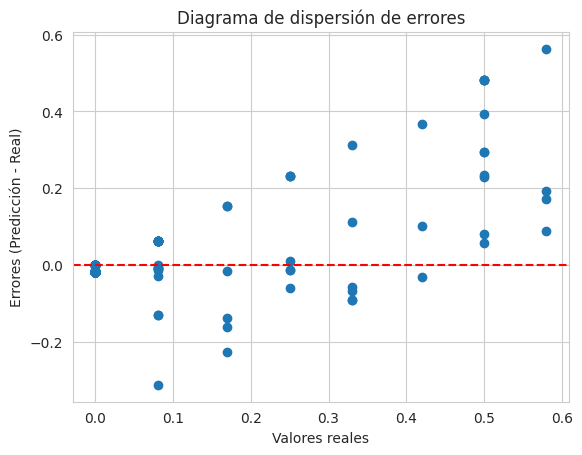

In [ ]:
import matplotlib.pyplot as plt

# Calcular los errores en el conjunto de prueba
errors = y_test - y_test_pred

# Dibujar un diagrama de dispersión de errores
plt.scatter(y_test, errors)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**GRANDIENT BOOSTING REGRESSION**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Crear el modelo de Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
# Entrenar el modelo
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento para Gradient Boosting Regression
train_score_gbr = gbr_model.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento (GBR): {:.4f}'.format(train_score_gbr))

Puntaje en conjunto de entrenamiento (GBR): 0.5991


El puntaje en conjunto de entrenamiento de 0.5991 significa que el modelo GBR explica aproximadamente el 59.91% de la variabilidad en los datos de entrenamiento. Esto sugiere que el modelo GBR se ajusta en menor medida pero si,  a los datos de entrenamiento y es capaz de predecir con precisión las respuestas en estos datos

In [ ]:
# Calcular y imprimir el puntaje de prueba para Gradient Boosting Regression
test_score_gbr = gbr_model.score(X_test, y_test)
print('Puntaje en conjunto de prueba (GBR): {:.4f}'.format(test_score_gbr))

Puntaje en conjunto de prueba (GBR): 0.5056


Un puntaje en conjunto de prueba de 0.5056 significa que el modelo GBR explica aproximadamente el 50.56% de la variabilidad en los datos de prueba. Esto sugiere que el modelo GBR tiene un rendimiento moderado. No es perfecto, pero ciertamente logra capturar una parte significativa de la relación entre las variables independientes y la variable dependiente.

In [ ]:
# Calcular métricas de evaluación para el conjunto de entrenamiento
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

In [ ]:
# Calcular métricas de evaluación para el conjunto de prueba
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

In [ ]:
# Imprimir resultados
print('Gradient Boosting Regression - MSE sobre el set de entrenamiento:', train_mse_gbr)
print('Gradient Boosting Regression - R² sobre el set de entrenamiento:', train_r2_gbr)
print('Gradient Boosting Regression - MSE sobre el set de evaluación:', test_mse_gbr)
print('Gradient Boosting Regression - R² sobre el set de evaluación:', test_r2_gbr)

Gradient Boosting Regression - MSE sobre el set de entrenamiento: 0.004629884619761673
Gradient Boosting Regression - R² sobre el set de entrenamiento: 0.5991190668355224
Gradient Boosting Regression - MSE sobre el set de evaluación: 0.008630403764816153
Gradient Boosting Regression - R² sobre el set de evaluación: 0.5055537709890268


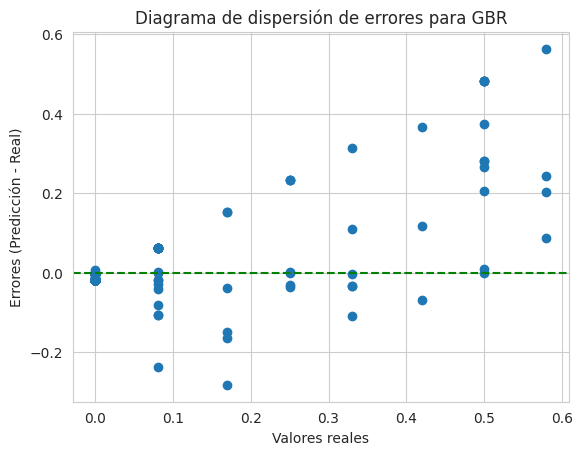

In [ ]:
# Calcular los errores en el conjunto de prueba para GBR
errors_gbr = y_test - y_test_pred_gbr

# Dibujar un diagrama de dispersión de errores para GBR
plt.scatter(y_test, errors_gbr)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para GBR")
plt.axhline(y=0, color='g', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**REGRESION DE VECTORES DE SOPORTE SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Escalar las características para SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear el modelo SVR
svr_model = SVR(kernel='rbf')  # Puedes experimentar con diferentes kernels (por ejemplo, 'linear', 'poly', 'rbf')

In [ ]:
# Entrenar el modelo
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento para SVR
train_score_svr = svr_model.score(X_train_scaled, y_train)
print('Puntaje en conjunto de entrenamiento (SVR): {:.4f}'.format(train_score_svr))

Puntaje en conjunto de entrenamiento (SVR): -0.2884


El modelo SVR explica aproximadamente el 14.12% de la variabilidad en los datos de entrenamiento. Esto sugiere que el modelo SVR no se ajusta muy bien a los datos de entrenamiento y no es capaz de predecir con precisión las respuestas en estos datos.

In [ ]:
# Calcular y imprimir el puntaje de prueba para SVR
test_score_svr = svr_model.score(X_test_scaled, y_test)
print('Puntaje en conjunto de prueba (SVR): {:.4f}'.format(test_score_svr))

Puntaje en conjunto de prueba (SVR): -0.0940


El modelo SVR nos arroja -0,094 es un valor negatgivo que podria deberse a varias razones, pero se entiende que el modelo no se puede aplicar para estos datos.  El SVR puede no ser adecuado para la naturaleza de los datos o las características disponibles. Al no adecuarse el modelo SVR no está funcionando bien. Se deberia analizar, la calidad y cantidad de datos, y considerar otras técnicas de modelado y validación para mejorar el rendimiento del modelo.

In [ ]:
# Calcular métricas de evaluación para el conjunto de entrenamiento
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)

In [ ]:
# Calcular métricas de evaluación para el conjunto de prueba
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

In [ ]:
# Imprimir resultados
print('SVR - MSE sobre el set de entrenamiento:', train_mse_svr)
print('SVR - R² sobre el set de entrenamiento:', train_r2_svr)
print('SVR - MSE sobre el set de evaluación:', test_mse_svr)
print('SVR - R² sobre el set de evaluación:', test_r2_svr)

SVR - MSE sobre el set de entrenamiento: 0.01487994649752845
SVR - R² sobre el set de entrenamiento: -0.2883877952176188
SVR - MSE sobre el set de evaluación: 0.019094909093918363
SVR - R² sobre el set de evaluación: -0.09397034624096712


In [ ]:
# Calcular los errores en el conjunto de prueba para SVR
errors_svr = y_test - y_test_pred_svr

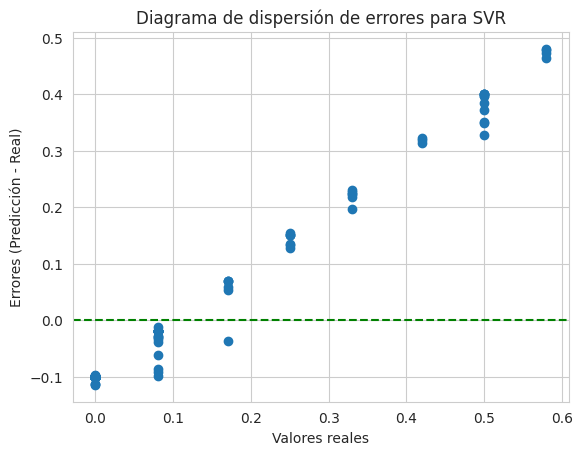

In [ ]:
# Calcular los errores en el conjunto de prueba para SVR
errors_svr = y_test - y_test_pred_svr

# Dibujar un diagrama de dispersión de errores para SVR
plt.scatter(y_test, errors_svr)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para SVR")
plt.axhline(y=0, color='g', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**RANDOM FOREST**

In [ ]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento
train_score = rf_model.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento: {:.4f}'.format(train_score))

Puntaje en conjunto de entrenamiento: 0.6008


Un puntaje en conjunto de entrenamiento de 0.6008 significa que el modelo Random Forest explica aproximadamente el 60.08% de la variabilidad en los datos de entrenamiento.

In [ ]:
# Calcular y imprimir el puntaje de prueba
test_score = rf_model.score(X_test, y_test)
print('Puntaje en conjunto de prueba: {:.4f}'.format(test_score))

Puntaje en conjunto de prueba: 0.5026


Un puntaje en conjunto de prueba de 0.5026 significa que el modelo Random Forest explica aproximadamente el 50.02% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene un rendimiento moderado, pero también indica que hay margen para mejorar, queda un 39.94% de la variabilidad que no está siendo explicada.

In [ ]:
# Calcular métricas en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
# Calcular métricas en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Mostrar métricas
print("Métricas en el conjunto de entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R^2:", train_r2)
print("\nMétricas en el conjunto de prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)

Métricas en el conjunto de entrenamiento:
MSE: 0.004609986937909838
MAE: 0.02723835024949883
R^2: 0.6008419178185742

Métricas en el conjunto de prueba:
MSE: 0.008681157948549276
MAE: 0.041081377436124125
R^2: 0.5026460026577606


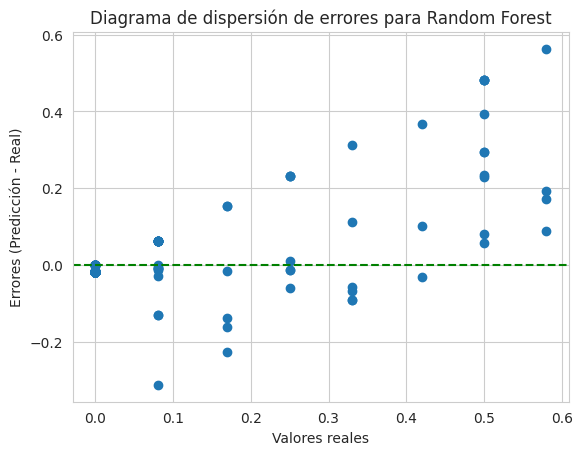

In [ ]:
# Calcular los errores en el conjunto de prueba
errors = y_test - y_test_pred

# Dibujar un diagrama de dispersión de errores
plt.scatter(y_test, errors)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para Random Forest")
plt.axhline(y=0, color='g', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

## **CONCLUSIONES**

Luego de ir practicando cada modelo, es importante interpretar los valores de coeficiente de determinación tanto para el conjunto de entrenamiento como para el conjunto de prueba. Aquí se presentan tus resultados de manera más clara:

Árbol de Decisión:
Entrenamiento: 0.6160
Prueba: 0.4388

Gradient Boosting Regressor (GBR):
Entrenamiento: 0.5991
Prueba: 0.5056

Support Vector Regression (SVR):
Entrenamiento: -0.2884
Prueba: -0.0940

Random Forest:
Entrenamiento: 0.6000
Prueba: 0.5026

**Interpretación de los Resultados**

1. Árbol de Decisión
Entrenamiento (0.6160): El modelo explica el 61.60% de la variabilidad en los datos de entrenamiento.
Prueba (0.4388): El modelo explica el 43.88% de la variabilidad en los datos de prueba.
Conclusión: Existe una disminución notable en el rendimiento del modelo en los datos de prueba, lo que sugiere que el modelo podría estar sobreajustado (overfitting) a los datos de entrenamiento.

2. Gradient Boosting Regressor (GBR)
Entrenamiento (0.5991): El modelo explica el 59.91% de la variabilidad en los datos de entrenamiento.
Prueba (0.5056): El modelo explica el 50.56% de la variabilidad en los datos de prueba.
Conclusión: El GBR tiene un rendimiento razonablemente consistente entre el entrenamiento y la prueba, lo que sugiere un buen balance entre el ajuste y la generalización.

3. Support Vector Regression (SVR)
Entrenamiento (-0.2884): El modelo tiene un rendimiento negativo, indicando que es peor que un modelo trivial que solo predice la media de los datos de entrenamiento.
Prueba (-0.0940): Similarmente, el rendimiento en los datos de prueba también es negativo.
Conclusión: El SVR no está funcionando bien para este conjunto de datos y puede estar muy mal ajustado o simplemente no ser adecuado para este problema.

4. Random Forest
Entrenamiento (0.6000): El modelo explica el 60.00% de la variabilidad en los datos de entrenamiento.
Prueba (0.5026): El modelo explica el 50.26% de la variabilidad en los datos de prueba.
Conclusión: El Random Forest también muestra un rendimiento consistente entre el entrenamiento y la prueba, similar al GBR, lo que sugiere un buen balance entre el ajuste y la generalización.

**Conclusiones Generales**

Mejor Modelo Global:

Tanto el Gradient Boosting Regressor como el Random Forest tienen los mejores rendimientos en el conjunto de prueba con alrededor del 50%. Ambos modelos parecen tener un buen equilibrio entre ajuste y generalización.

Modelos con Problemas:

El Support Vector Regression tiene un rendimiento muy pobre, con negativos en ambos conjuntos, lo que sugiere que no es adecuado para este problema específico.

Potencial de Mejora en Árbol de Decisión:

El Árbol de Decisión muestra una disminución significativa en el rendimiento de prueba en comparación con el entrenamiento, indicando posible sobreajuste. Podrías considerar la poda del árbol o ajustar los parámetros para mejorar su rendimiento de generalización.

**Consistencia y Generalización:**

El GBR y el Random Forest muestran un rendimiento más consistente y son probablemente las mejores opciones para este conjunto de datos. Podrías considerar ajustar más estos modelos para ver si puedes mejorar aún más su rendimiento.

Como pasos siguiente se deberia optimización de hiperparámetros para los mejores modelos (GBR y Random Forest), luego hacer una ingenieria de dato y hacer una evaluacion de modelos alternativos distintos, a los ya utilizados ademas de un analisis de errores.








